In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# fft 1d

def fft1d(x):
    N = len(x)
    if N <= 1:
        return x
    indicePar = fft1d(x[0::2])
    indiceImpar = fft1d(x[1::2])
    T = [np.exp(-2j * np.pi * k / N) * indiceImpar[k] for k in range(N // 2)]
    resultado = [indicePar[k] + T[k] for k in range(N // 2)] + [indicePar[k] - T[k] for k in range(N // 2)]
    return resultado

In [9]:
# fft inversa 1d

def ifft1d(X):
    N = len(X)
    if N <= 1:
        return X
    indicePar = ifft1d(X[0::2])
    indiceImpar = ifft1d(X[1::2])
    T = [np.exp(2j * np.pi * k / N) * indiceImpar[k] for k in range(N // 2)]
    resultado = [indicePar[k] + T[k] for k in range(N // 2)] + [indicePar[k] - T[k] for k in range(N // 2)]
    return resultado

In [10]:
# parâmetros do sinal

# número de amostras
totalAmostras = 1024

# frequência
taxaAmostragem = 1  

# duração do sinal (s)
duracao = totalAmostras / taxaAmostragem

# vetor de tempo
t = np.linspace(0, duracao, totalAmostras, endpoint=False)  

# sinal
sinal = np.sin(2 * np.pi * 5 * t) + 0.5 * np.sin(2 * np.pi * 20 * t)

In [11]:
# calculando a fft do sinal
fftResultado = fft1d(sinal)

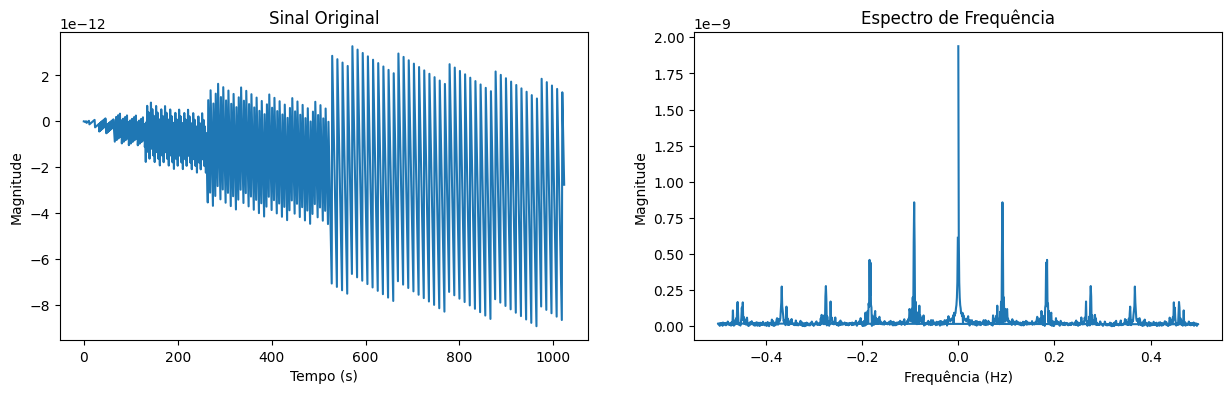

In [12]:
plt.figure(figsize=(15, 4))

# plot do sinal
plt.subplot(121)
plt.plot(t, sinal)
plt.title('Sinal Original')
plt.xlabel("Tempo (s)")
plt.ylabel("Magnitude")

# plot do espectro de frequência |fft|
plt.subplot(122)
frequencias = np.fft.fftfreq(totalAmostras, 1/taxaAmostragem)
plt.plot(frequencias, np.abs(fftResultado))
plt.title('Espectro de Frequência')
plt.xlabel("Frequência (Hz)")
plt.ylabel("Magnitude")

plt.show()